In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re
from scipy.stats import pearsonr
import numpy as np

In [2]:
# Mount the drive unit (ignore if you are working in local)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Specify the path to your input file
file_path1 = '/content/drive/MyDrive/Colab Notebooks/Social Network/data/graph.txt'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/Social Network/data/metadata.txt'

# Read the input string from the file
with open(file_path1, 'r') as file:
    input_string = file.read()

# Read the input string from the file
with open(file_path2, 'r') as file:
    metadata_input_string = file.read()

# Extract node and edge information using regular expressions
node_data = re.findall(r'node\s*\[\s*id\s+(\d+)\s*\]', input_string)
edge_data = re.findall(r'edge\s*\[\s*source\s+(\d+)\s*target\s+(\d+)\s*duration\s+(\d+)\s*count\s+(\d+)\s*\]', input_string)


# Extract teacher nodes from metadata
teacher_nodes = set()
sex_info = {}  # Dictionary to store sex information for each node
class_info = {}  # Dictionary to store class information for each node

for line in metadata_input_string.split('\n'):
    parts = line.split('\t')
    if len(parts) == 3:
        node_id = int(parts[0])
        sex = parts[2]
        sex_info[node_id] = sex
        if parts[1] == 'Teachers':
            teacher_nodes.add(node_id)
        class_label = parts[1]
        class_info[node_id] = class_label

# Create a directed graph
G = nx.Graph()

# Add all nodes to the graph with sex and class information as attributes
for node_id in map(int, node_data):
    sex = sex_info.get(node_id, 'Unknown')
    class_label = class_info.get(node_id, 'Unknown')
    G.add_node(node_id, sex=sex, class_label=class_label)

# Add edges to the graph with duration greater than 120
for source, target, duration, count in edge_data:
    if int(duration) > 320:
        G.add_edge(int(source), int(target), duration=int(duration), count=int(count))

# Exclude teachers from the nodes
G.remove_nodes_from(teacher_nodes)

# Create an adjacency matrix
adjacency_matrix = nx.adjacency_matrix(G).toarray()

print(adjacency_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]]


In [4]:
print(class_info)

{1426: '5B', 1427: '5B', 1428: '5B', 1429: '5B', 1430: '5B', 1431: '5B', 1434: '5B', 1435: '5B', 1437: '5B', 1439: '5B', 1441: '5B', 1443: '5B', 1451: '5A', 1452: '5A', 1453: '5A', 1457: '5A', 1458: '5A', 1459: '5A', 1461: '5A', 1465: '5B', 1468: '5A', 1471: '5B', 1475: '5B', 1477: '5A', 1479: '5A', 1480: '5B', 1482: '5B', 1483: '5A', 1486: '5B', 1489: '5B', 1493: '5A', 1495: '5A', 1498: '5A', 1500: '4A', 1501: '5A', 1502: '5A', 1503: '4A', 1504: '4A', 1511: '5A', 1516: '5A', 1519: '4A', 1520: '5A', 1521: 'Teachers', 1522: '5A', 1524: '4A', 1525: '4A', 1528: '4A', 1532: '4A', 1533: '4A', 1538: '4A', 1539: '4A', 1545: '4A', 1546: '4A', 1548: '4A', 1549: '4A', 1551: '3B', 1552: '3B', 1555: '3B', 1558: '3B', 1560: '3B', 1562: '3B', 1563: '5B', 1564: '3B', 1567: '3B', 1570: '3B', 1572: '3B', 1574: '3B', 1578: '5B', 1579: '3B', 1580: '3B', 1585: '5B', 1592: '5B', 1594: '3B', 1601: '4B', 1603: '2A', 1604: '2A', 1606: '2A', 1609: '2A', 1613: '2A', 1616: '2A', 1617: '2A', 1618: '4A', 1625: '2A

In [5]:
G.nodes[1426]

{'sex': 'M', 'class_label': '5B'}

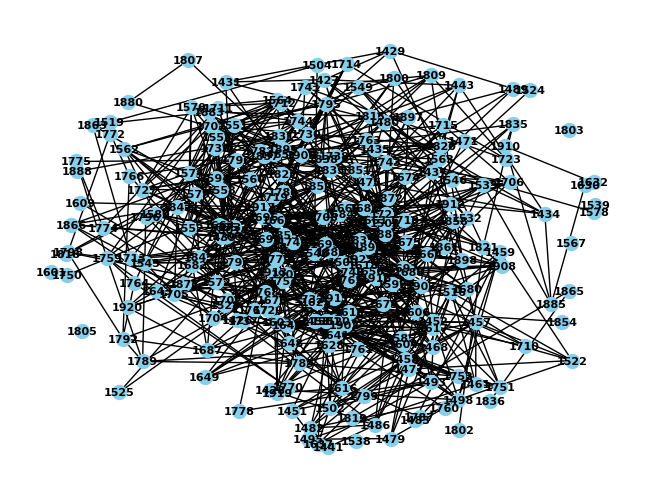

In [6]:
# Draw the graph
pos = nx.spring_layout(G, k =0.6)  # You can change the layout if needed
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=100, node_color='skyblue', font_size=8, arrowsize=10)

# Save or display the plot
plt.savefig("graph.png")  # Save the plot as an image file
plt.show()  # Display the plot

In [7]:
nx.transitivity(G)

0.35229662423907027

In [8]:
centr = nx.degree_centrality(G)

In [9]:
# Ottieni i 10 valori massimi dal dizionario
valori_massimi = sorted(centr.values(), reverse=True)[:10]

print("I 10 valori massimi sono:", valori_massimi)

I 10 valori massimi sono: [0.09691629955947137, 0.09691629955947137, 0.0881057268722467, 0.07929515418502203, 0.07929515418502203, 0.0748898678414097, 0.0748898678414097, 0.0748898678414097, 0.0748898678414097, 0.07048458149779736]


In [10]:
nx.density(G)

0.03559007651286807

In [11]:
G.nodes()

NodeView((1538, 1539, 1545, 1546, 1548, 1549, 1551, 1552, 1555, 1558, 1560, 1562, 1563, 1564, 1567, 1570, 1572, 1574, 1578, 1579, 1580, 1585, 1592, 1594, 1601, 1603, 1604, 1606, 1609, 1613, 1616, 1617, 1618, 1625, 1628, 1630, 1632, 1637, 1641, 1643, 1647, 1648, 1649, 1656, 1661, 1663, 1664, 1665, 1666, 1670, 1673, 1674, 1675, 1680, 1681, 1682, 1684, 1685, 1687, 1688, 1695, 1696, 1697, 1698, 1700, 1702, 1704, 1705, 1706, 1707, 1708, 1710, 1711, 1712, 1713, 1714, 1715, 1718, 1719, 1720, 1722, 1723, 1727, 1730, 1731, 1732, 1737, 1738, 1739, 1741, 1743, 1744, 1748, 1749, 1750, 1751, 1752, 1757, 1759, 1760, 1761, 1763, 1764, 1765, 1766, 1767, 1768, 1770, 1772, 1774, 1775, 1778, 1779, 1780, 1782, 1783, 1787, 1789, 1790, 1792, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1805, 1807, 1809, 1815, 1818, 1819, 1820, 1821, 1822, 1831, 1833, 1835, 1836, 1837, 1838, 1843, 1847, 1851, 1854, 1855, 1857, 1858, 1859, 1861, 1863, 1865, 1866, 1872, 1877, 1880, 1883, 1885, 1887, 1888, 1889, 1890, 

In [12]:
#homophily for the attribute 'sex'
nx.attribute_assortativity_coefficient(G,'sex')

0.20844853447926387

In [13]:
#homophily for the attribute 'class_label'
nx.attribute_assortativity_coefficient(G,'class_label')

0.7793885744626772

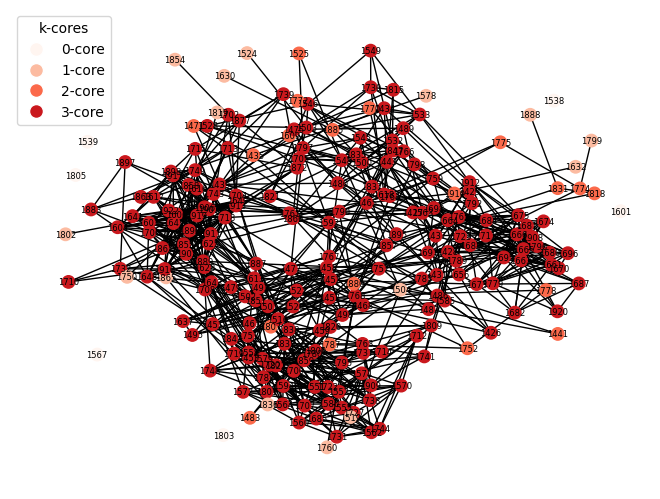

In [14]:
G_1_core = nx.k_core(G, k= 1)
G_2_core = nx.k_core(G, k= 2)
G_3_core = nx.k_core(G, k= 3)

k_mask = []
for i in G.nodes():
  if i in G_3_core.nodes():
    k_mask.append(3)
  elif i in G_2_core.nodes():
    k_mask.append(2)
  elif i in G_1_core.nodes():
    k_mask.append(1)
  else:
    k_mask.append(0)

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

cmap = plt.get_cmap('Reds')
norm = Normalize(vmin=0, vmax=4)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a mapping of 'alcohol' attribute values to colors
color_legend = {0: '0-core', 1: '1-core', 2: '2-core', 3: '3-core'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [cmap(norm(k)) for k in k_mask]

# Draw the graph with node colors
pos = nx.spring_layout(G, k=0.4)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=80, font_size=6)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(legend_labels[label])), markersize=10, label=label) for label in color_legend.values()]

plt.legend(handles=legend_handles, title='k-cores', loc='upper left')

plt.show()

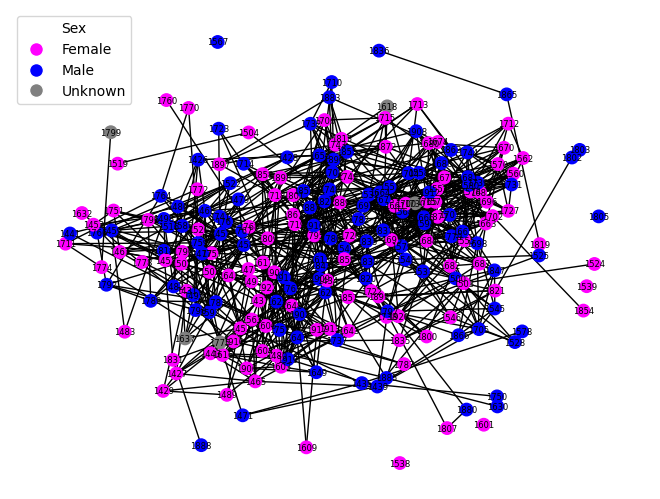

<Figure size 640x480 with 0 Axes>

In [15]:
# Create a mapping of 'sex' attribute values to colors
color_map = {'F': 'magenta', 'M': 'blue', 'Unknown':'grey'}
color_legend = {'F': 'Female', 'M': 'Male', 'Unknown': 'Unknown'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['sex']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G,k=0.4)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=80, font_size=6)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show()
plt.savefig('sex_feature')

#TAKING ONLY 1 CLASS FOR COMPARISON

In [16]:
# Select nodes with 'class_label' == '4A'
selected_nodes = [node for node, data in G.nodes(data=True) if data.get('class_label') == '4A']

In [17]:
print(selected_nodes)

[1538, 1539, 1545, 1546, 1548, 1549, 1618, 1705, 1730, 1797, 1815, 1837, 1500, 1503, 1504, 1519, 1524, 1525, 1528, 1532, 1533]


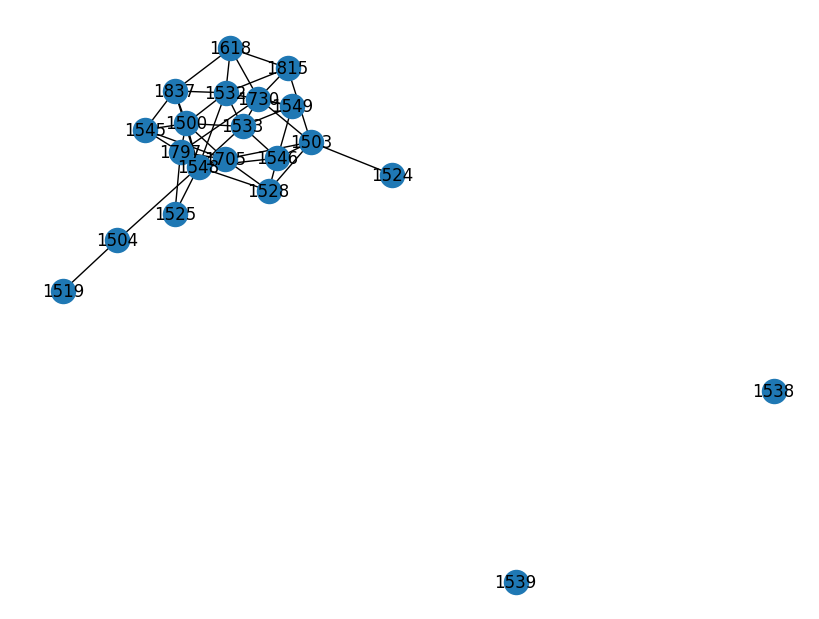

In [18]:
H = G.subgraph(selected_nodes)
nx.spring_layout(H,k=0.4)
plt.figure(figsize=(8,6))
nx.draw(H,with_labels=True)

In [19]:
nx.density(H)

0.21428571428571427

In [20]:
nx.transitivity(H)

0.3925233644859813

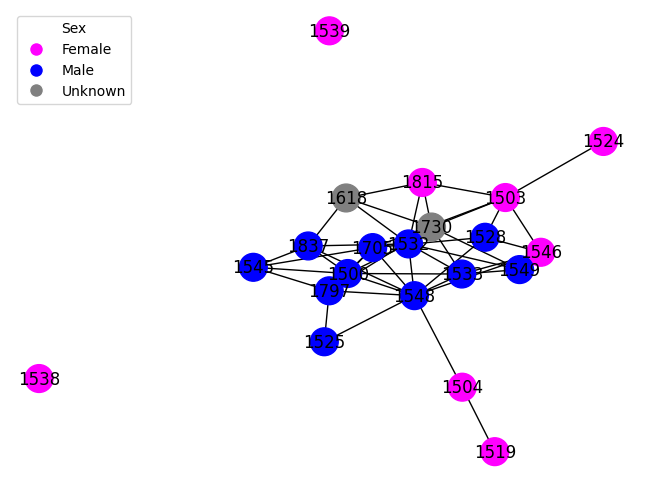

<Figure size 640x480 with 0 Axes>

In [21]:
# Create a mapping of 'sex' attribute values to colors
color_map = {'F': 'magenta', 'M': 'blue', 'Unknown':'grey'}
color_legend = {'F': 'Female', 'M': 'Male', 'Unknown': 'Unknown'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[H.nodes[node]['sex']] for node in H.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(H,k=0.4)  # You can choose a different layout if desired
nx.draw(H, pos, with_labels=True, node_color=node_colors, node_size=400, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show()
plt.savefig('sex_feature')

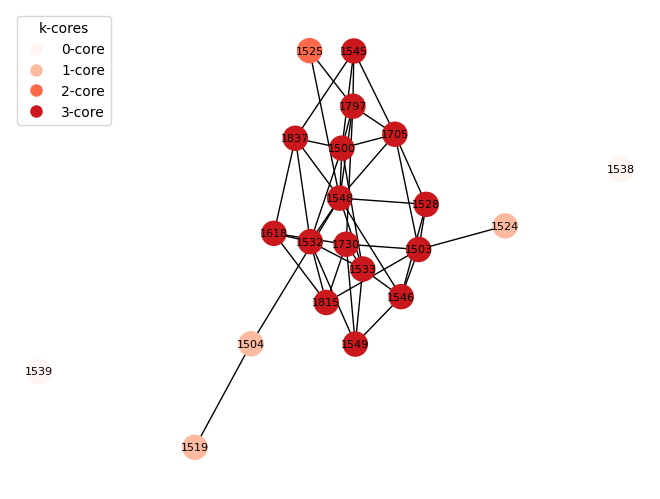

In [22]:
G_1_core = nx.k_core(H, k= 1)
G_2_core = nx.k_core(H, k= 2)
G_3_core = nx.k_core(H, k= 3)

k_mask = []
for i in H.nodes():
  if i in G_3_core.nodes():
    k_mask.append(3)
  elif i in G_2_core.nodes():
    k_mask.append(2)
  elif i in G_1_core.nodes():
    k_mask.append(1)
  else:
    k_mask.append(0)

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

cmap = plt.get_cmap('Reds')
norm = Normalize(vmin=0, vmax=4)
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Create a mapping of 'alcohol' attribute values to colors
color_legend = {0: '0-core', 1: '1-core', 2: '2-core', 3: '3-core'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [cmap(norm(k)) for k in k_mask]

# Draw the graph with node colors
pos = nx.spring_layout(H, k=0.4)  # You can choose a different layout if desired
nx.draw(H, pos, with_labels=True, node_color=node_colors, node_size=300, font_size=8)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(legend_labels[label])), markersize=10, label=label) for label in color_legend.values()]

plt.legend(handles=legend_handles, title='k-cores', loc='upper left')

plt.show()

In [23]:
centrH = nx.degree_centrality(H)

In [24]:
print(centrH)

{1538: 0.0, 1539: 0.0, 1797: 0.30000000000000004, 1545: 0.2, 1546: 0.25, 1548: 0.5, 1549: 0.2, 1815: 0.2, 1705: 0.30000000000000004, 1837: 0.25, 1730: 0.30000000000000004, 1618: 0.2, 1500: 0.35000000000000003, 1503: 0.30000000000000004, 1504: 0.1, 1519: 0.05, 1524: 0.05, 1525: 0.1, 1528: 0.2, 1532: 0.35000000000000003, 1533: 0.30000000000000004}


In [25]:
nx.attribute_assortativity_coefficient(H,'sex')

0.26493108728943354